In [1]:
import folium
from geopy.geocoders import Nominatim
import geopandas as gpd
import pandas as pd
 
slhospitals = gpd.read_file("D:\Projects\Geopatial\Data\hotosm_lka_health_facilities_points_shp\hotosm_lka_health_facilities_points.shp")

In [2]:
slhospitals

osm_id addrcity                                   name healthcare  \
0     1.918158e+08      NaN                Asiri Surgical Hospital   hospital   
1     2.530222e+08      NaN        Joseph Fraser Memorial Hospital   hospital   
2     2.543673e+08  Wethara              Wethara District Hospital   hospital   
3     2.551797e+08      NaN  Sri Jayawardenapura teaching hospital   hospital   
4     3.101668e+08      NaN                         Co-op Hospital   hospital   
...            ...      ...                                    ...        ...   
1005  1.069728e+10    Kandy                     New Lanka Medicare   pharmacy   
1006  1.069915e+10      NaN                         Medical Centre     doctor   
1007  1.070210e+10      NaN                    Family Medical Care     doctor   
1008  1.070210e+10      NaN                  Suvani Medical Centre     doctor   
1009  1.070605e+10      NaN                    Dr.Sri Lak Panditha     doctor   

      capacitype  addrfull building  healthca_1 operatorty source   amenity  \
0            NaN       NaN      NaN         NaN        NaN    NaN  hospital   
1            NaN       NaN      NaN         NaN        NaN    NaN  hospital   
2            NaN       NaN      NaN         NaN        NaN    NaN  hospital   
3            NaN       NaN      NaN         NaN        NaN    NaN  hospital   
4            NaN       NaN      NaN         NaN        NaN    NaN  hospital   
...          ...       ...      ...         ...        ...    ...       ...   
1005         NaN       NaN      NaN         NaN        NaN    NaN  pharmacy   
1006         NaN       NaN      NaN         NaN        NaN    NaN   doctors   
1007         NaN       NaN      NaN         NaN        NaN    NaN   doctors   
1008         NaN       NaN      NaN         NaN        NaN    NaN   doctors   
1009         NaN       NaN      NaN         NaN        NaN    NaN   doctors   

                      geometry  
0     POINT (79.87972 6.89455)  
1     POINT (79.86522 6.89520)  
2     POINT (79.97297 6.78520)  
3     POINT (79.92615 6.86833)  
4     POINT (80.21615 6.03665)  
...                        ...  
1005  POINT (80.62064 7.28094)  
1006  POINT (80.63384 7.20114)  
1007  POINT (80.62593 7.20872)  
1008  POINT (80.63649 7.19481)  
1009  POINT (80.10382 6.40484)  

[1010 rows x 12 columns]

In [3]:
slhospitals.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   osm_id      1010 non-null   float64 
 1   addrcity    211 non-null    object  
 2   name        789 non-null    object  
 3   healthcare  506 non-null    object  
 4   capacitype  0 non-null      float64 
 5   addrfull    0 non-null      float64 
 6   building    1 non-null      object  
 7   healthca_1  0 non-null      float64 
 8   operatorty  9 non-null      object  
 9   source      4 non-null      object  
 10  amenity     966 non-null    object  
 11  geometry    1010 non-null   geometry
dtypes: float64(4), geometry(1), object(7)
memory usage: 94.8+ KB


In [4]:
slhospitals.shape

(1010, 12)

In [5]:
#finding count of total null values in each column
slhospitals.isna().sum()

osm_id           0
addrcity       799
name           221
healthcare     504
capacitype    1010
addrfull      1010
building      1009
healthca_1    1010
operatorty    1001
source        1006
amenity         44
geometry         0
dtype: int64

<Axes: >

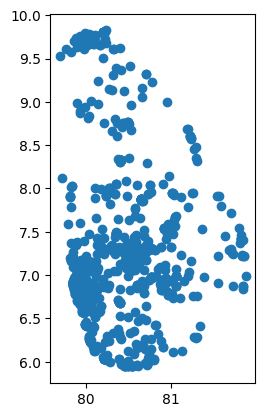

In [6]:
slhospitals.plot()

<Axes: >

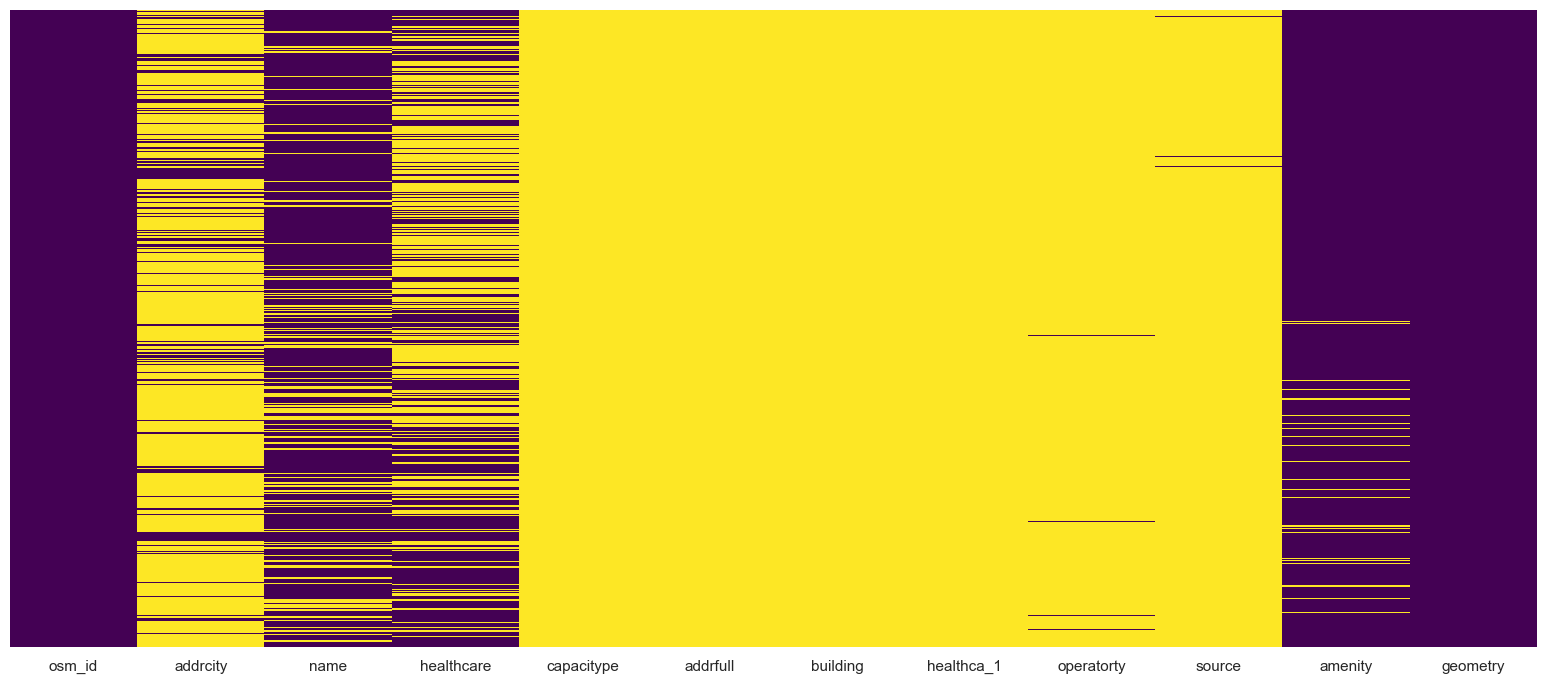

In [7]:
import seaborn as sns        
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(slhospitals.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
# Reading the SL weather dataset for the analysis
sl_weatherdata = pd.read_csv('D:\Projects\Geopatial\Data\SriLanka_Weather_Dataset.csv') 
# Displaying the dataset into tabular format
sl_weatherdata.head(5)

time  weathercode  temperature_2m_max  temperature_2m_min  \
0  2010-01-01            2                30.0                22.7   
1  2010-01-02           51                29.9                23.5   
2  2010-01-03           51                29.5                23.2   
3  2010-01-04            2                28.9                21.9   
4  2010-01-05            1                28.1                21.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.1                      34.4                      25.2   
1                 26.2                      33.8                      26.2   
2                 26.0                      34.3                      26.3   
3                 25.3                      31.6                      23.4   
4                 24.5                      30.1                      23.1   

   apparent_temperature_mean           sunrise            sunset  ...  \
0                       29.2  2010-01-01T00:52  2010-01-01T12:35  ...   
1                       29.8  2010-01-02T00:52  2010-01-02T12:36  ...   
2                       29.9  2010-01-03T00:53  2010-01-03T12:36  ...   
3                       27.8  2010-01-04T00:53  2010-01-04T12:37  ...   
4                       26.1  2010-01-05T00:53  2010-01-05T12:37  ...   

   precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
0                  0.0               11.7               27.4   
1                  1.0               13.0               27.0   
2                  3.0               12.3               27.4   
3                  0.0               17.0               34.6   
4                  0.0               18.7               37.1   

   winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
0                          20                        4.58       7.0   
1                          24                        3.84       7.0   
2                          16                        3.65       7.0   
3                         356                        3.79       7.0   
4                         355                        4.97       7.0   

   longitude  elevation    country     city  
0  79.899994       16.0  Sri Lanka  Colombo  
1  79.899994       16.0  Sri Lanka  Colombo  
2  79.899994       16.0  Sri Lanka  Colombo  
3  79.899994       16.0  Sri Lanka  Colombo  
4  79.899994       16.0  Sri Lanka  Colombo  

[5 rows x 24 columns]

In [9]:
sl_weatherdata.shape

(147480, 24)

In [10]:
sl_weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147480 entries, 0 to 147479
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   time                        147480 non-null  object 
 1   weathercode                 147480 non-null  int64  
 2   temperature_2m_max          147480 non-null  float64
 3   temperature_2m_min          147480 non-null  float64
 4   temperature_2m_mean         147480 non-null  float64
 5   apparent_temperature_max    147480 non-null  float64
 6   apparent_temperature_min    147480 non-null  float64
 7   apparent_temperature_mean   147480 non-null  float64
 8   sunrise                     147480 non-null  object 
 9   sunset                      147480 non-null  object 
 10  shortwave_radiation_sum     147480 non-null  float64
 11  precipitation_sum           147480 non-null  float64
 12  rain_sum                    147480 non-null  float64
 13  snowfall_sum  

In [11]:
sl_weatherdata.isna().sum()

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

<Axes: >

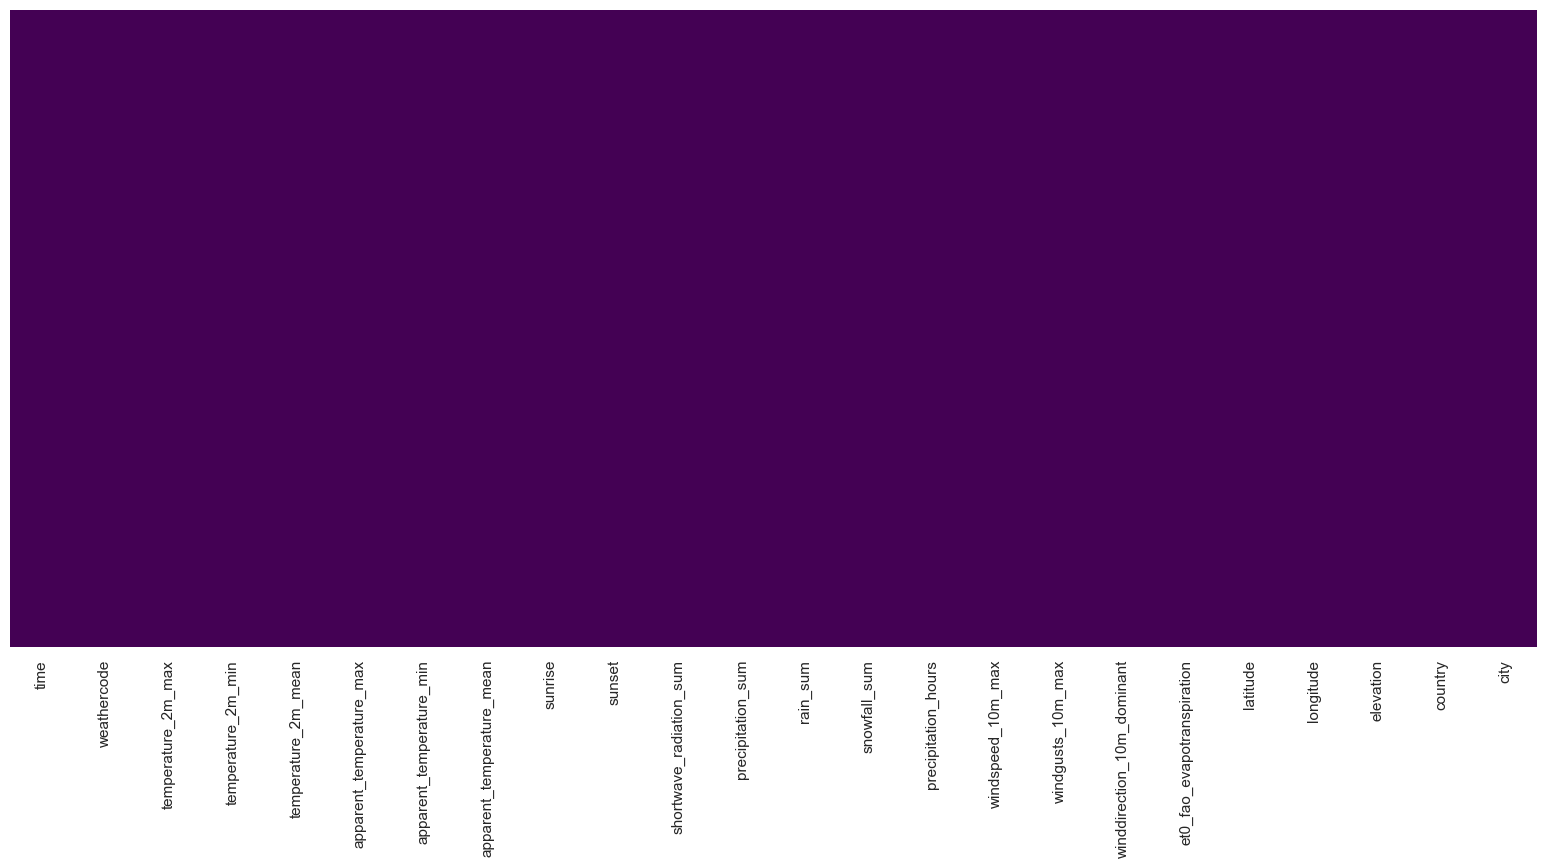

In [12]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(sl_weatherdata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\mrtha\AppData\Local\Temp\ipykernel_18460\3845746880.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sl_weatherdata["rain_sum"])


<Axes: xlabel='rain_sum', ylabel='Density'>

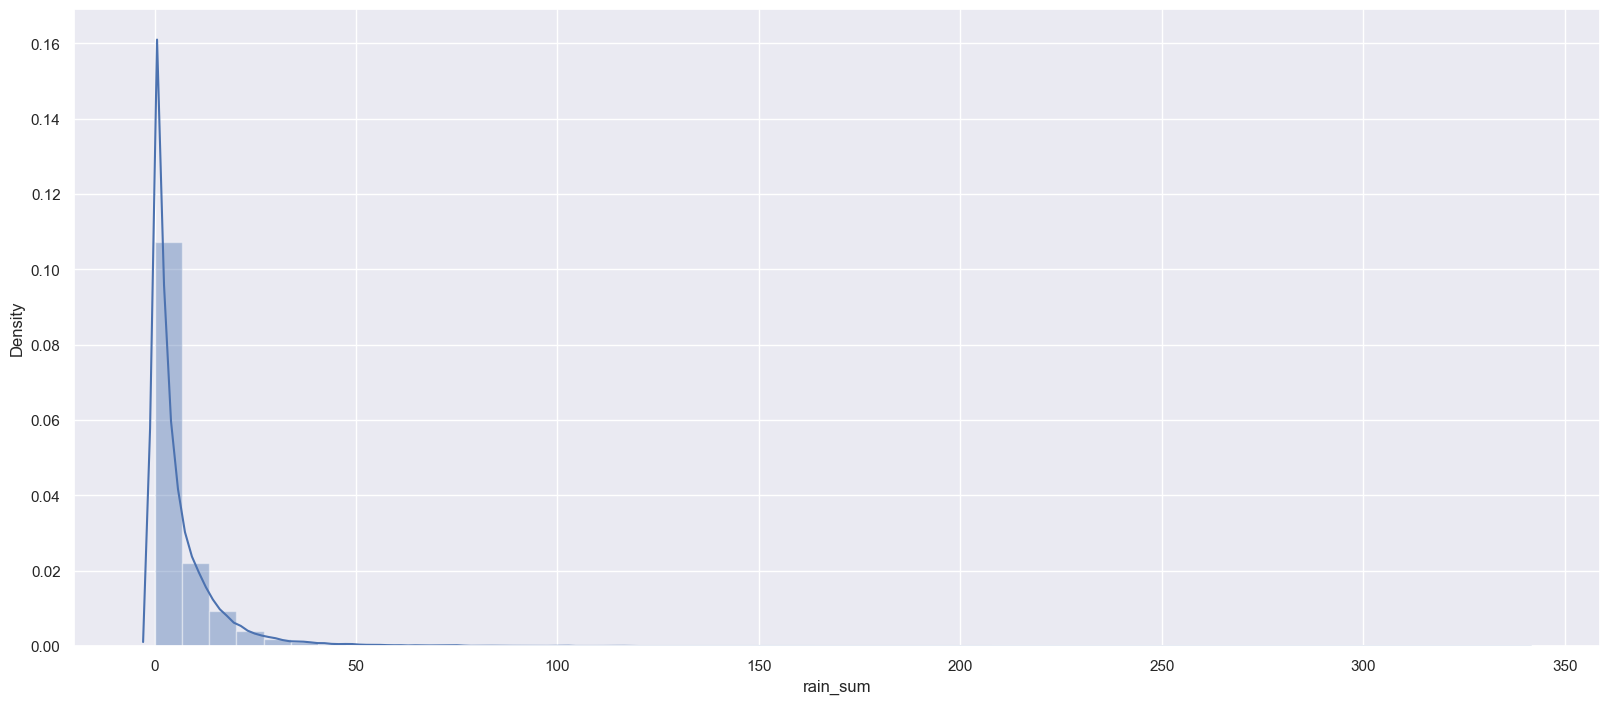

In [13]:
sns.distplot(sl_weatherdata["rain_sum"])

In [14]:
# sns.scatterplot(x='time',y='rain_sum',data=sl_weatherdata)

<Axes: xlabel='precipitation_sum', ylabel='rain_sum'>

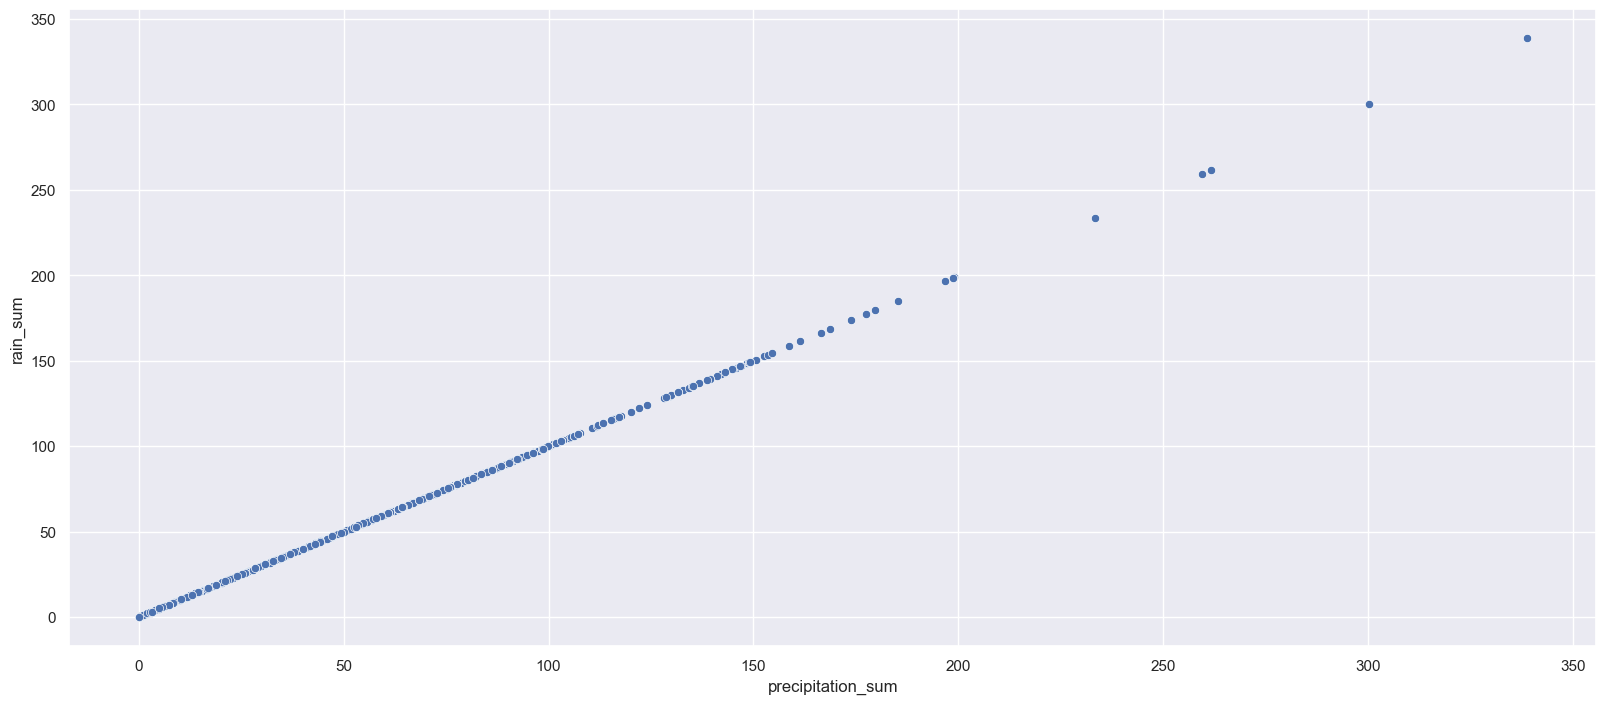

In [15]:
sns.scatterplot(x='precipitation_sum',y='rain_sum',data=sl_weatherdata)

<Axes: ylabel='count'>

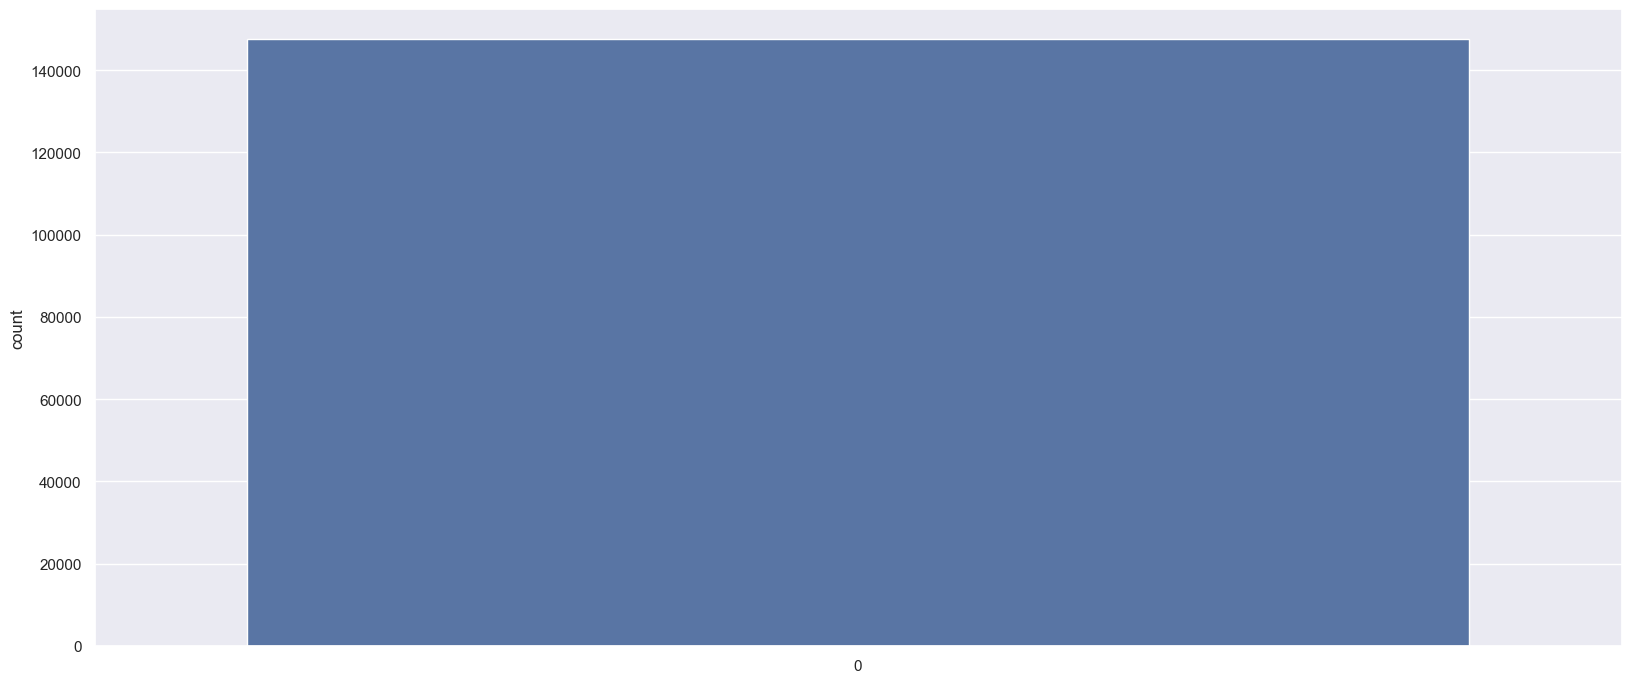

In [16]:
sns.countplot(sl_weatherdata["weathercode"])

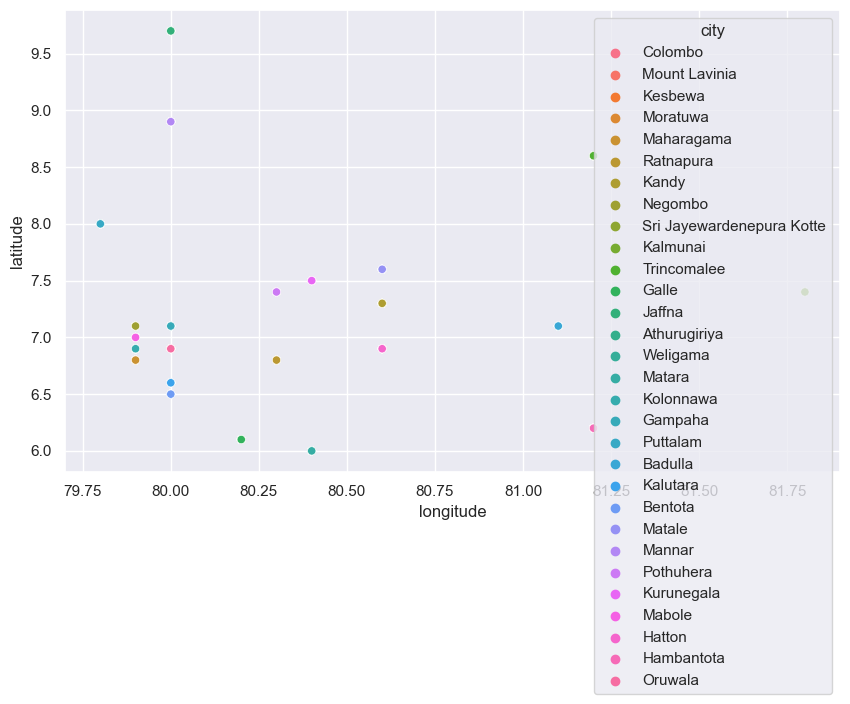

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=sl_weatherdata.longitude, y=sl_weatherdata.latitude, hue=sl_weatherdata.city)
plt.ioff()
plt.show()


In [18]:
import folium
from folium.plugins import HeatMap
m=folium.Map([6.9271,79.8612],zoom_start=7)
HeatMap(sl_weatherdata[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

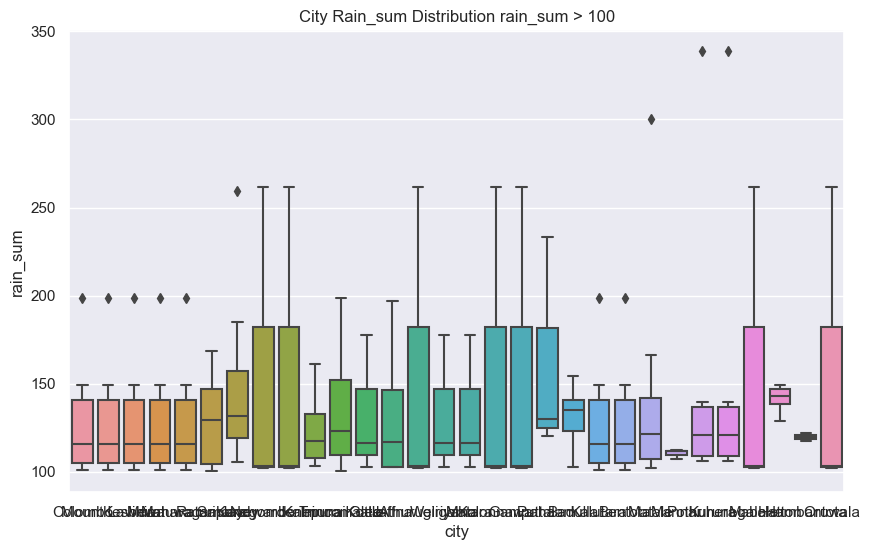

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
ng = sl_weatherdata [sl_weatherdata.rain_sum > 100]
# Check if ng is not empty
if not ng.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='rain_sum', x='city', data=ng)
    plt.title('City Rain_sum Distribution rain_sum > 100')
    plt.show()
else:
    print('No data to plot.')

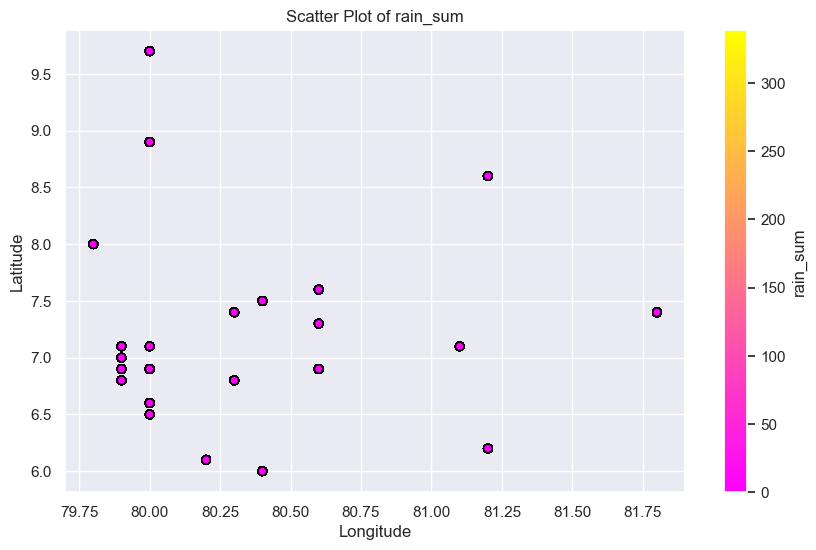

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(sl_weatherdata.longitude, sl_weatherdata.latitude, c=sl_weatherdata.rain_sum, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('rain_sum')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of rain_sum')
plt.show()

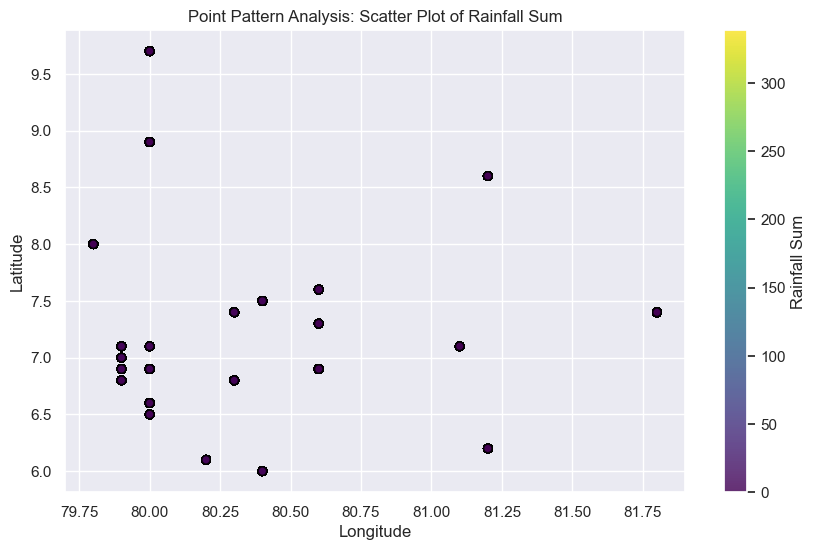

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter_plot = plt.scatter(sl_weatherdata.longitude, sl_weatherdata.latitude, c=sl_weatherdata.rain_sum, cmap='viridis', edgecolor='black', linewidth=1, alpha=0.8)

cbar = plt.colorbar(scatter_plot)
cbar.set_label('Rainfall Sum')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Point Pattern Analysis: Scatter Plot of Rainfall Sum')
plt.grid(True)  # Add grid lines for better readability

plt.show()


In [21]:
import geopandas as gpd
# read the csv file
db =  gpd.read_file("NCVA CO Variables.shp")

In [22]:
# get the basic information
# db.info()

In [23]:
db.plot()

<Axes: >

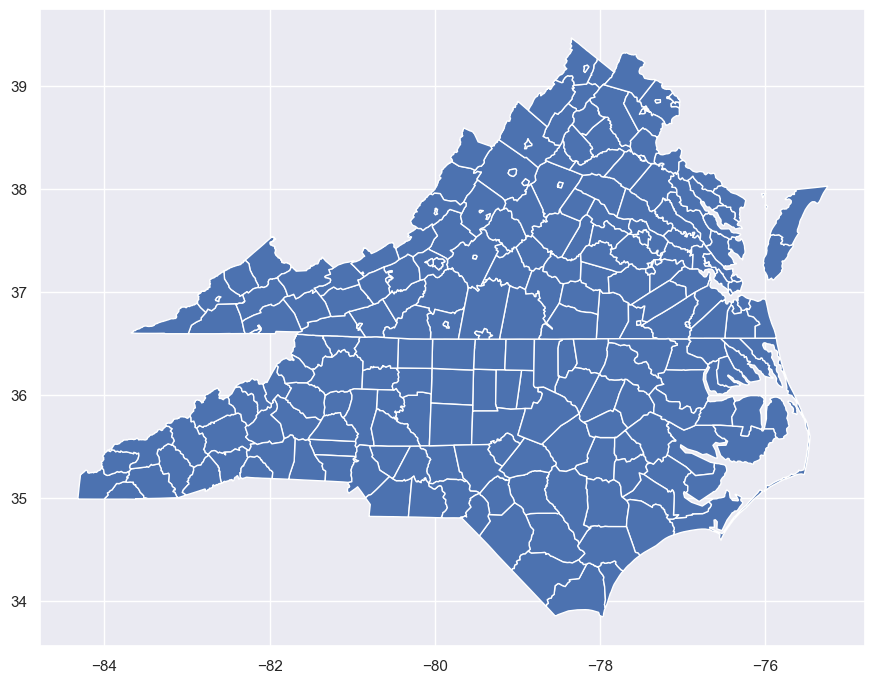

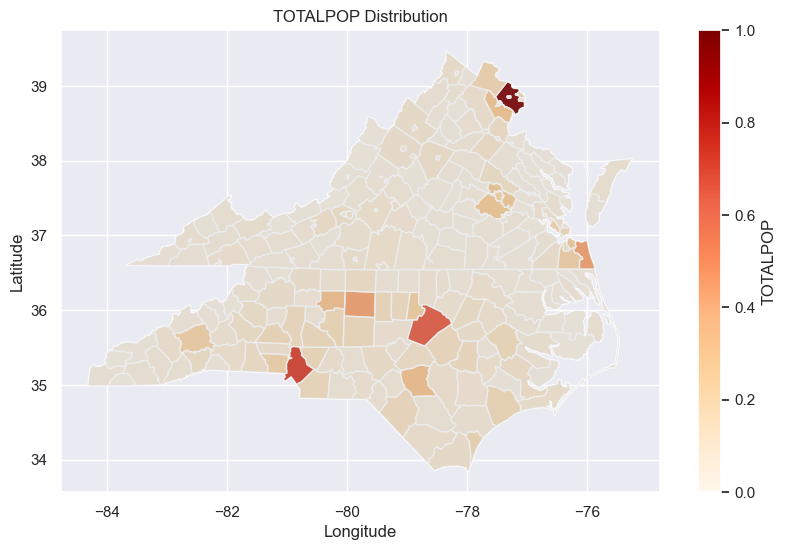

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the data
data = gpd.read_file('NCVA CO Variables.shp')

# Create a base map
basemap = gpd.read_file('NCVA CO Variables.shp')

# Create a choropleth plot
ax = data.plot(column='TOTALPOP', cmap='OrRd', figsize=(10, 6))  # Create an Axes object
basemap.plot(alpha=0.2, color='gray', ax=ax)  # Plot the basemap on the same Axes

# Add a title and labels
plt.title('TOTALPOP Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap='OrRd')
sm.set_array([])
plt.colorbar(sm, label='TOTALPOP', ax=ax)  # Specify the Axes for the colorbar

# Show the map
plt.show()


# Predictions using machine learning model

In [112]:
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
 
from sklearn import metrics




import seaborn as sns
from sklearn.metrics import confusion_matrix



import numpy as np # linear algebra
import plotly as plotly            
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

In [39]:
sl_weatherdata.isna().sum()

time                          0
weathercode                   0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
sunrise                       0
sunset                        0
shortwave_radiation_sum       0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
precipitation_hours           0
windspeed_10m_max             0
windgusts_10m_max             0
winddirection_10m_dominant    0
et0_fao_evapotranspiration    0
latitude                      0
longitude                     0
elevation                     0
country                       0
city                          0
dtype: int64

In [55]:
sl_weatherdata.head()

time  weathercode  temperature_2m_max  temperature_2m_min  \
0  2010-01-01            2                30.0                22.7   
1  2010-01-02           51                29.9                23.5   
2  2010-01-03           51                29.5                23.2   
3  2010-01-04            2                28.9                21.9   
4  2010-01-05            1                28.1                21.3   

   temperature_2m_mean  apparent_temperature_max  apparent_temperature_min  \
0                 26.1                      34.4                      25.2   
1                 26.2                      33.8                      26.2   
2                 26.0                      34.3                      26.3   
3                 25.3                      31.6                      23.4   
4                 24.5                      30.1                      23.1   

   apparent_temperature_mean           sunrise            sunset  ...  \
0                       29.2  2010-01-01T00:52  2010-01-01T12:35  ...   
1                       29.8  2010-01-02T00:52  2010-01-02T12:36  ...   
2                       29.9  2010-01-03T00:53  2010-01-03T12:36  ...   
3                       27.8  2010-01-04T00:53  2010-01-04T12:37  ...   
4                       26.1  2010-01-05T00:53  2010-01-05T12:37  ...   

   precipitation_hours  windspeed_10m_max  windgusts_10m_max  \
0                  0.0               11.7               27.4   
1                  1.0               13.0               27.0   
2                  3.0               12.3               27.4   
3                  0.0               17.0               34.6   
4                  0.0               18.7               37.1   

   winddirection_10m_dominant  et0_fao_evapotranspiration  latitude  \
0                          20                        4.58       7.0   
1                          24                        3.84       7.0   
2                          16                        3.65       7.0   
3                         356                        3.79       7.0   
4                         355                        4.97       7.0   

   longitude  elevation    country     city  
0  79.899994       16.0  Sri Lanka  Colombo  
1  79.899994       16.0  Sri Lanka  Colombo  
2  79.899994       16.0  Sri Lanka  Colombo  
3  79.899994       16.0  Sri Lanka  Colombo  
4  79.899994       16.0  Sri Lanka  Colombo  

[5 rows x 24 columns]

In [92]:
cities = sl_weatherdata.city.unique()
 
jaff_weather = sl_weatherdata[sl_weatherdata['city'] == 'Jaffna']
 
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = jaff_weather.apply(dateTime, axis='columns')
 
jaff_weather = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
jaff_weather.set_index('time', drop = False, inplace = True)
jaff_weather.head()

time  weathercode  temperature_2m_mean  \
time                                                      
2010-01-01 2010-01-01            2                 26.6   
2010-01-02 2010-01-02           51                 25.9   
2010-01-03 2010-01-03           51                 25.4   
2010-01-04 2010-01-04            3                 25.3   
2010-01-05 2010-01-05            2                 25.2   

            apparent_temperature_mean  shortwave_radiation_sum  \
time                                                             
2010-01-01                       27.2                    16.89   
2010-01-02                       27.3                    16.48   
2010-01-03                       26.4                    18.55   
2010-01-04                       25.9                    18.48   
2010-01-05                       25.7                    21.39   

            precipitation_sum  rain_sum  precipitation_hours  \
time                                                           
2010-01-01                0.0       0.0                  0.0   
2010-01-02                1.0       1.0                  7.0   
2010-01-03                0.2       0.2                  2.0   
2010-01-04                0.0       0.0                  0.0   
2010-01-05                0.0       0.0                  0.0   

            windspeed_10m_max  windgusts_10m_max  winddirection_10m_dominant  \
time                                                                           
2010-01-01               27.1               39.6                          45   
2010-01-02               27.0               38.5                          42   
2010-01-03               27.8               39.2                          41   
2010-01-04               21.6               31.7                          29   
2010-01-05               23.7               33.1                          25   

            et0_fao_evapotranspiration    city  
time                                            
2010-01-01                        4.86  Jaffna  
2010-01-02                        4.03  Jaffna  
2010-01-03                        4.33  Jaffna  
2010-01-04                        4.76  Jaffna  
2010-01-05                        5.29  Jaffna

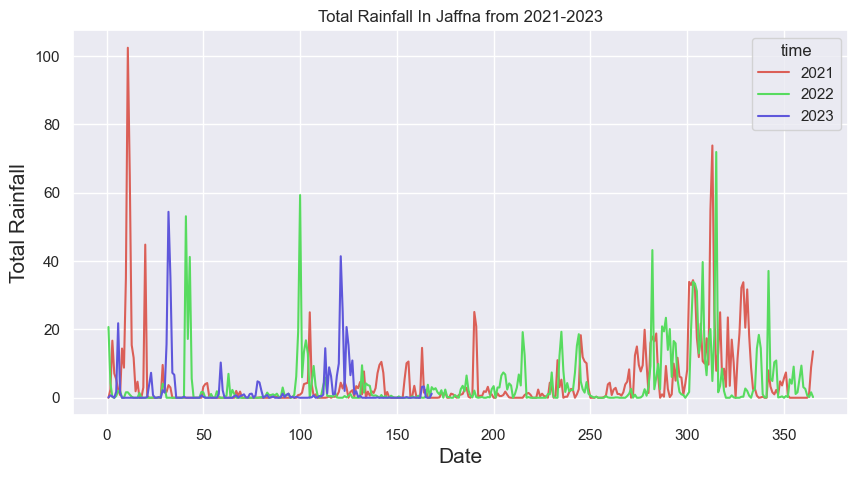

In [93]:
R = jaff_weather.loc['2021-01-01':'2023-12-31']['rain_sum']
fig = plt.subplots(figsize=(10, 5))
palette = sns.color_palette("hls", 3)
sns.lineplot(x=R.index.dayofyear, 
             y=R, 
             hue=R.index.year,
            palette=palette,);
plt.title('Total Rainfall In Jaffna from 2021-2023')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Rainfall', fontsize=15)
plt.show()

In [94]:
cols = ['time', 'rain_sum']
raindata = jaff_weather[cols].copy()
raindata['year']= pd.DatetimeIndex(raindata['time']).year
raindata['month']=pd.DatetimeIndex(raindata['time']).month

In [95]:
raindata

time  rain_sum  year  month
time                                        
2010-01-01 2010-01-01       0.0  2010      1
2010-01-02 2010-01-02       1.0  2010      1
2010-01-03 2010-01-03       0.2  2010      1
2010-01-04 2010-01-04       0.0  2010      1
2010-01-05 2010-01-05       0.0  2010      1
...               ...       ...   ...    ...
2023-06-13 2023-06-13       3.3  2023      6
2023-06-14 2023-06-14       0.1  2023      6
2023-06-15 2023-06-15       0.0  2023      6
2023-06-16 2023-06-16       0.0  2023      6
2023-06-17 2023-06-17       1.2  2023      6

[4916 rows x 4 columns]

#applying month names

In [96]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',
              8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
raindata['month'].replace(month_names, inplace=True)
print(raindata)

                 time  rain_sum  year month
time                                       
2010-01-01 2010-01-01       0.0  2010   Jan
2010-01-02 2010-01-02       1.0  2010   Jan
2010-01-03 2010-01-03       0.2  2010   Jan
2010-01-04 2010-01-04       0.0  2010   Jan
2010-01-05 2010-01-05       0.0  2010   Jan
...               ...       ...   ...   ...
2023-06-13 2023-06-13       3.3  2023   Jun
2023-06-14 2023-06-14       0.1  2023   Jun
2023-06-15 2023-06-15       0.0  2023   Jun
2023-06-16 2023-06-16       0.0  2023   Jun
2023-06-17 2023-06-17       1.2  2023   Jun

[4916 rows x 4 columns]


In [97]:
month_nm = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec','rain_sum' ]
df = pd.DataFrame(raindata, columns=[ 'year', 'month'] + month_nm)

# Pivoting the data 
df_jaff_pivoted = df.pivot_table(index='year', values='rain_sum', columns='month', aggfunc='sum')
df_jaff_pivoted = df_jaff_pivoted.reset_index()
df_jaff_pivoted


month  year    Apr    Aug    Dec    Feb    Jan   Jul   Jun   Mar    May  \
0      2010   65.3  146.2  415.5    0.0   44.7  27.6  53.8   4.9   54.9   
1      2011  162.8   64.2  112.2   97.9  243.4  63.2   7.5   6.2    4.2   
2      2012   48.9   42.2  125.3    6.2   11.5  34.6   8.3   6.5    1.6   
3      2013   11.9   53.0  106.4   43.3   65.8  17.6  28.1  48.5   31.2   
4      2014   17.4   79.8  405.3    7.5  193.1  16.0   3.0   0.5  117.8   
5      2015   67.7   59.5  271.0   18.7   10.3  21.5  34.2  14.7  174.0   
6      2016   10.8   40.9   89.1    9.6   13.9  56.3  41.0   4.2  279.5   
7      2017    2.1  112.5  109.4   10.1  105.4  17.4  23.5  37.4   17.8   
8      2018   31.8   34.7  110.0   17.8   51.8  33.2  12.3  17.1  105.5   
9      2019   17.4   71.7  246.0   13.9    0.2  52.8   5.8   1.3    1.6   
10     2020   15.0   47.7  617.6    7.2    7.1  99.2  54.2   1.4   23.1   
11     2021   49.9   44.4   66.8   18.7  356.1  71.3  56.0   5.6   83.4   
12     2022  172.7  126.4  165.9  123.7   43.1  67.1  22.6  18.6   29.7   
13     2023   56.6    NaN    NaN  116.4   58.0   NaN   8.1  21.9  126.1   

month    Nov    Oct    Sep  
0      356.8  174.5   96.3  
1      251.0  332.5   45.9  
2       71.0  448.9   43.7  
3      147.9   70.7   75.4  
4      383.9  260.3   75.4  
5      601.0  229.8   88.7  
6      146.3   62.5   10.3  
7      469.7  213.3   96.6  
8      450.8  240.0   43.8  
9      187.6  294.8  121.2  
10     261.0   53.6  111.8  
11     549.2  348.3  106.1  
12     275.7  315.5   40.4  
13       NaN    NaN    NaN

#Manupulate the data for flood

In [98]:
df_jaff_pivoted['Magnitude'] = df_jaff_pivoted.iloc[:, 1:].sum(axis=1)
df_jaff_pivoted['flood'] = df_jaff_pivoted['Magnitude'].apply(lambda x: 1 if x > 1000 else 0)

#remove the NaN value and replace 0

In [99]:
df_jaff_pivoted['Jan'].fillna(0, inplace=True)
df_jaff_pivoted['Feb'].fillna(0, inplace=True)
df_jaff_pivoted['Mar'].fillna(0, inplace=True)
df_jaff_pivoted['Apr'].fillna(0, inplace=True)
df_jaff_pivoted['May'].fillna(0, inplace=True)
df_jaff_pivoted['Jun'].fillna(0, inplace=True)
df_jaff_pivoted['Jul'].fillna(0, inplace=True)
df_jaff_pivoted['Aug'].fillna(0, inplace=True)
df_jaff_pivoted['Sep'].fillna(0, inplace=True)
df_jaff_pivoted['Oct'].fillna(0, inplace=True)
df_jaff_pivoted['Nov'].fillna(0, inplace=True)
df_jaff_pivoted['Dec'].fillna(0, inplace=True)

In [100]:
# Computing pairwise covariance of columns
df_jaff_pivoted.cov()

month            year          Apr          Aug           Dec          Feb  \
month                                                                        
year        17.500000    -3.457692   -49.115385   -116.080769    64.869231   
Apr         -3.457692  2866.933242   595.450110  -1520.263352  1728.118901   
Aug        -49.115385   595.450110  1539.493407   2371.926484  -144.037912   
Dec       -116.080769 -1520.263352  2371.926484  29198.465330 -3199.167143   
Feb         64.869231  1728.118901  -144.037912  -3199.167143  1895.385275   
Jan         -3.400000  1211.124945  -110.005165  -4241.988242   543.522418   
Jul         29.453846   372.241978    39.747473   1582.154396   -14.570879   
Jun          4.415385  -146.203846   147.592308   1150.799231  -292.208462   
Mar          2.461538   -90.607473    12.006044  -1109.410879   162.290330   
May         32.207692 -1002.481978 -1055.943626  -2138.745165  -468.362967   
Nov        -14.611538   -55.386758  2409.314725   6222.859725 -2849.560330   
Oct       -120.257692  2779.687637  1318.154066  -3065.828626  -391.207582   
Sep        -12.130769  -613.219341   599.591209   3717.707363  -918.102088   
Magnitude -185.646154  6125.394066  7723.289121  28968.509121 -3947.900440   
flood        0.153846     6.189011     9.820879     37.751648    -2.708791   

month               Jan          Jul          Jun          Mar          May  \
month                                                                         
year          -3.400000    29.453846     4.415385     2.461538    32.207692   
Apr         1211.124945   372.241978  -146.203846   -90.607473 -1002.481978   
Aug         -110.005165    39.747473   147.592308    12.006044 -1055.943626   
Dec        -4241.988242  1582.154396  1150.799231 -1109.410879 -2138.745165   
Feb          543.522418   -14.570879  -292.208462   162.290330  -468.362967   
Jan        11196.100659   393.033187   133.006923  -156.748791  -814.950110   
Jul          393.033187   763.369890   234.610769  -196.355055  -421.314505   
Jun          133.006923   234.610769   375.460000   -26.609231   314.527692   
Mar         -156.748791  -196.355055   -26.609231   207.429011  -174.684945   
May         -814.950110  -421.314505   314.527692  -174.684945  6399.449890   
Nov         7304.988022   254.578132  1234.021538  -101.752088  1599.125714   
Oct         4853.423736   625.954725  -764.058462  -589.801099 -4398.186264   
Sep          549.239011   273.297912   280.870769   -60.246044 -1341.152527   
Magnitude  20860.746593  3906.748022  2641.809231 -2124.490220 -3502.718791   
flood         14.993407     4.352747     1.300000    -2.089011   -10.637363   

month               Nov           Oct          Sep      Magnitude       flood  
month                                                                          
year         -14.611538   -120.257692   -12.130769    -185.646154    0.153846  
Apr          -55.386758   2779.687637  -613.219341    6125.394066    6.189011  
Aug         2409.314725   1318.154066   599.591209    7723.289121    9.820879  
Dec         6222.859725  -3065.828626  3717.707363   28968.509121   37.751648  
Feb        -2849.560330   -391.207582  -918.102088   -3947.900440   -2.708791  
Jan         7304.988022   4853.423736   549.239011   20860.746593   14.993407  
Jul          254.578132    625.954725   273.297912    3906.748022    4.352747  
Jun         1234.021538   -764.058462   280.870769    2641.809231    1.300000  
Mar         -101.752088   -589.801099   -60.246044   -2124.490220   -2.089011  
May         1599.125714  -4398.186264 -1341.152527   -3502.718791  -10.637363  
Nov        32360.454780   6786.443791  3611.022967   58776.110220   63.158242  
Oct         6786.443791  17196.892582   952.674396   25304.148901   22.139560  
Sep         3611.022967    952.674396  1441.216484    8492.900110   11.048352  
Magnitude  58776.110220  25304.148901  8492.900110  153224.545934  155.318681  
flood         63.158242     22.139560    11.04835

In [101]:
# Calculating the relationship between each column in dataset / Calculating correlation coefficients
df_jaff_pivoted.corr()

month          year       Apr       Aug       Dec       Feb       Jan  \
month                                                                   
year       1.000000 -0.015437 -0.299233 -0.162391  0.356181 -0.007681   
Apr       -0.015437  1.000000  0.283431 -0.166161  0.741338  0.213770   
Aug       -0.299233  0.283431  1.000000  0.353779 -0.084322 -0.026497   
Dec       -0.162391 -0.166161  0.353779  1.000000 -0.430039 -0.234615   
Feb        0.356181  0.741338 -0.084322 -0.430039  1.000000  0.117987   
Jan       -0.007681  0.213770 -0.026497 -0.234615  0.117987  1.000000   
Jul        0.254833  0.251622  0.036665  0.335121 -0.012113  0.134440   
Jun        0.054471 -0.140919  0.194130  0.347566 -0.346387  0.064872   
Mar        0.040856 -0.117495  0.021246 -0.450794  0.258827 -0.102858   
May        0.096243 -0.234043 -0.336419 -0.156462 -0.134481 -0.096278   
Nov       -0.019416 -0.005750  0.341348  0.202443 -0.363850  0.383777   
Oct       -0.219214  0.395879  0.256184 -0.136818 -0.068523  0.349776   
Sep       -0.076384 -0.301677  0.402533  0.573100 -0.555492  0.136730   
Magnitude -0.113371  0.292254  0.502862  0.433094 -0.231661  0.503654   
flood      0.078446  0.246557  0.533909  0.471261 -0.132719  0.302254   

month           Jul       Jun       Mar       May       Nov       Oct  \
month                                                                   
year       0.254833  0.054471  0.040856  0.096243 -0.019416 -0.219214   
Apr        0.251622 -0.140919 -0.117495 -0.234043 -0.005750  0.395879   
Aug        0.036665  0.194130  0.021246 -0.336419  0.341348  0.256184   
Dec        0.335121  0.347566 -0.450794 -0.156462  0.202443 -0.136818   
Feb       -0.012113 -0.346387  0.258827 -0.134481 -0.363850 -0.068523   
Jan        0.134440  0.064872 -0.102858 -0.096278  0.383777  0.349776   
Jul        1.000000  0.438226 -0.493446 -0.190620  0.051221  0.172763   
Jun        0.438226  1.000000 -0.095349  0.202911  0.354025 -0.300691   
Mar       -0.493446 -0.095349  1.000000 -0.151618 -0.039274 -0.312281   
May       -0.190620  0.202911 -0.151618  1.000000  0.111123 -0.419254   
Nov        0.051221  0.354025 -0.039274  0.111123  1.000000  0.287680   
Oct        0.172763 -0.300691 -0.312281 -0.419254  0.287680  1.000000   
Sep        0.260558  0.381821 -0.110187 -0.441613  0.528760  0.191362   
Magnitude  0.361230  0.348302 -0.376839 -0.111859  0.834698  0.492950   
flood      0.336048  0.143109 -0.309394 -0.283641  0.748908  0.360122   

month           Sep  Magnitude     flood  
month                                     
year      -0.076384  -0.113371  0.078446  
Apr       -0.301677   0.292254  0.246557  
Aug        0.402533   0.502862  0.533909  
Dec        0.573100   0.433094  0.471261  
Feb       -0.555492  -0.231661 -0.132719  
Jan        0.136730   0.503654  0.302254  
Jul        0.260558   0.361230  0.336048  
Jun        0.381821   0.348302  0.143109  
Mar       -0.110187  -0.376839 -0.309394  
May       -0.441613  -0.111859 -0.283641  
Nov        0.528760   0.834698  0.748908  
Oct        0.191362   0.492950  0.360122  
Sep        1.000000   0.571514  0.620781  
Magnitude  0.571514   1.000000  0.846380  
flood      0.620781   0.846380  1.000000

In [102]:
 # Target column of floods   
y = df_jaff_pivoted.iloc[:,-1]
y

0     1
1     1
2     0
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    1
11    1
12    1
13    0
Name: flood, dtype: int64

In [230]:
#  columns from JAN to DEC
x = df_jaff_pivoted.iloc[:,1:13]
x.head(5)

month    Apr    Aug    Dec   Feb    Jan   Jul   Jun   Mar    May    Nov  \
0       65.3  146.2  415.5   0.0   44.7  27.6  53.8   4.9   54.9  356.8   
1      162.8   64.2  112.2  97.9  243.4  63.2   7.5   6.2    4.2  251.0   
2       48.9   42.2  125.3   6.2   11.5  34.6   8.3   6.5    1.6   71.0   
3       11.9   53.0  106.4  43.3   65.8  17.6  28.1  48.5   31.2  147.9   
4       17.4   79.8  405.3   7.5  193.1  16.0   3.0   0.5  117.8  383.9   

month    Oct   Sep  
0      174.5  96.3  
1      332.5  45.9  
2      448.9  43.7  
3       70.7  75.4  
4      260.3  75.4

# array x will be scaled to values between 0 and 1,preserving the relative relationship between the data pts

In [231]:
minmax = preprocessing.MinMaxScaler(feature_range = (0,1))
minmax.fit(x).transform(x)

array([[3.70457210e-01, 1.00000000e+00, 6.72765544e-01, 0.00000000e+00,
        1.25035122e-01, 2.78225806e-01, 9.58490566e-01, 9.16666667e-02,
        1.91795610e-01, 5.93677205e-01, 3.88728002e-01, 7.94554455e-01],
       [9.41969519e-01, 4.39124487e-01, 1.81670984e-01, 7.91430881e-01,
        6.83338016e-01, 6.37096774e-01, 8.49056604e-02, 1.18750000e-01,
        9.35588341e-03, 4.17637271e-01, 7.40699488e-01, 3.78712871e-01],
       [2.74325909e-01, 2.88645691e-01, 2.02882124e-01, 5.01212611e-02,
        3.17504917e-02, 3.48790323e-01, 1.00000000e-01, 1.25000000e-01,
        0.00000000e+00, 1.18136439e-01, 1.00000000e+00, 3.60561056e-01],
       [5.74443142e-02, 3.62517100e-01, 1.72279793e-01, 3.50040420e-01,
        1.84321439e-01, 1.77419355e-01, 4.73584906e-01, 1.00000000e+00,
        1.06513134e-01, 2.46089850e-01, 1.57496102e-01, 6.22112211e-01],
       [8.96834701e-02, 5.45827633e-01, 6.56250000e-01, 6.06305578e-02,
        5.42006182e-01, 1.61290323e-01, 0.00000000e+00, 0.00

# Splitting the data into   x_train ,y_train & x_test y_test 

In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=50)

# Decision Tree Classification

In [233]:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [234]:
# Prediction performed on   x_test

In [235]:
y_pred = dtree_clf.predict(x_test)
y_pred

array([1, 1, 0, 0, 0], dtype=int64)

In [236]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print("accuracy : ", accuracy)

accuracy :  0.8


In [237]:
pd.DataFrame({'actual':y_test,'prediction':y_pred})

actual  prediction
12       1           1
10       1           1
9        1           0
3        0           0
2        0           0

In [238]:
clf = RandomForestClassifier(n_estimators = 200)
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [239]:
y_predict2= clf.predict(x_test)
y_predict2

array([1, 1, 1, 1, 1], dtype=int64)

In [240]:
accuracy2 = metrics.accuracy_score(y_test,y_predict2)
print("Accuracy of Random Forest 2:", accuracy2)

Accuracy of Random Forest 2: 0.6


In [241]:
pd.DataFrame({'Actual':y_test,'Prediction':y_predict2})

Actual  Prediction
12       1           1
10       1           1
9        1           1
3        0           1
2        0           1

In [242]:

param_grid = {
    'max_depth': [None, 20, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}


r_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1)


r_search.fit(x_train, y_train)


best_params_random = r_search.best_params_
best_model_random = r_search.best_estimator_

D:\Projects\Geopatial\venv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



In [243]:
y_predict3= best_model_random.predict(x_test)
y_predict3

array([1, 1, 1, 1, 1], dtype=int64)

In [244]:
accuracy3 = metrics.accuracy_score(y_test,y_predict3)
print("Accuracy of RandomizedSearchCV on Random Forest:", accuracy3)

Accuracy of RandomizedSearchCV on Random Forest: 0.6


In [245]:
pd.DataFrame({'Actual':y_test,'Prediction':y_predict3})

Actual  Prediction
12       1           1
10       1           1
9        1           1
3        0           1
2        0           1

In [246]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

g_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1)

g_search.fit(x_train, y_train)

best_params_grid = g_search.best_params_
best_model_grid = g_search.best_estimator_

D:\Projects\Geopatial\venv\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



In [247]:

y_predict4= best_model_grid.predict(x_test)
y_predict4

array([1, 1, 1, 1, 1], dtype=int64)

In [248]:
accuracy4 = metrics.accuracy_score(y_test,y_predict4)
print("Accuracy of GridSearchCV on Random Forest:", accuracy4)

Accuracy of GridSearchCV on Random Forest: 0.6


In [249]:
pd.DataFrame({'Actual':y_test,'Prediction':y_predict4})

Actual  Prediction
12       1           1
10       1           1
9        1           1
3        0           1
2        0           1

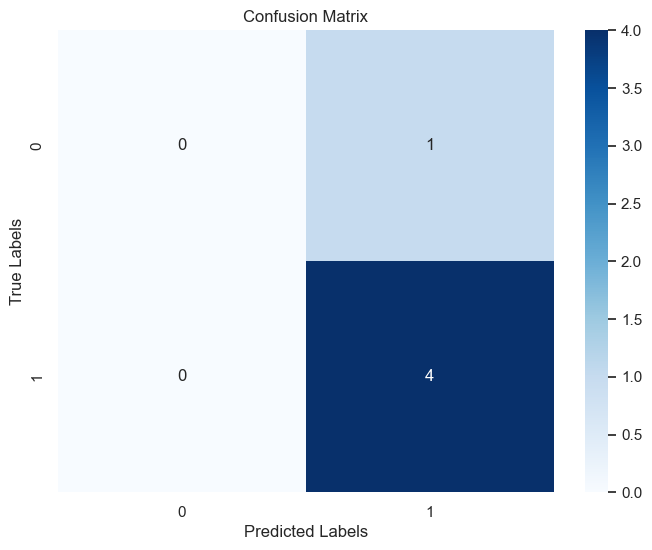

In [214]:
# Computing the confusion matrix
cm = confusion_matrix(y_test, y_predict3)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()